# Лабораторная работа №4

In [12]:
from matplotlib import pyplot as plt
import time

## 1. Пошаговый алгортим

Time spent: 2.245968818664551


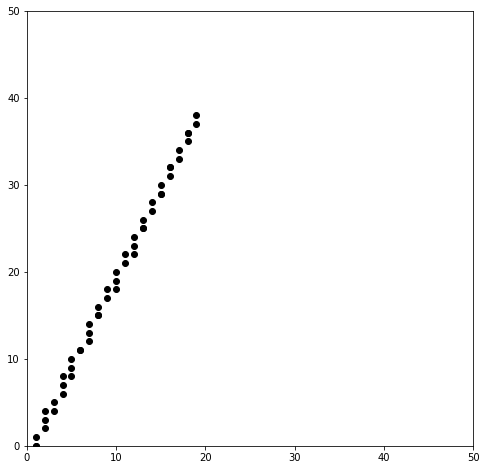

In [33]:
f = plt.figure(1, figsize = (8,8))
ax = f.gca()
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

x1 = 1.0
y1 = 1.0
x2 = 20.0
y2 = 40.0
    
k = (y2 - y1)/(x2 - x1)
b = y2 - k * x2
# step = abs(x2 - x1)/(max(abs(x2 - x1), abs(y2 - y1) * 2))
step = abs(x2 - x1)/50
step = step if x2 > x1 else -step

x = x1
y = k * x + b

begin = time.time()
while x < x2:
    ax.plot(int(x), int(y), 'ko')
    y = k * x + b
    x = x + step
end = time.time()

print('Time spent:', (end - begin))

## 2. Алгоритм ЦДА

Time spent: 0.07094907760620117


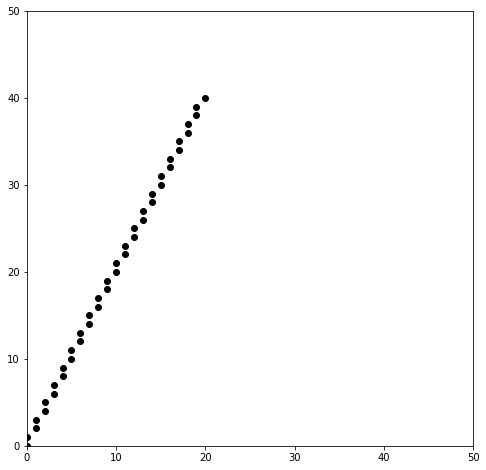

In [32]:
f = plt.figure(1, figsize = (8,8))
ax = f.gca()
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

x1 = 0.0
y1 = 0.0
x2 = 20.0
y2 = 40.0

delta_x = x2 - x1
delta_y = y2 - y1

steps = max(delta_x, delta_y)

x_inc = delta_x / steps
y_inc = delta_y / steps

dx = delta_x / steps
dy = delta_y / steps

begin = time.time()
for i in range(int(steps+1)):
    ax.plot(int(x1), int(y1), 'ko')
    x1 += dx
    y1 += dy
end = time.time()
print('Time spent:', (end - begin))

 ## 3. Алгоритм Брезенхема

Time spent: {} 0.05998873710632324


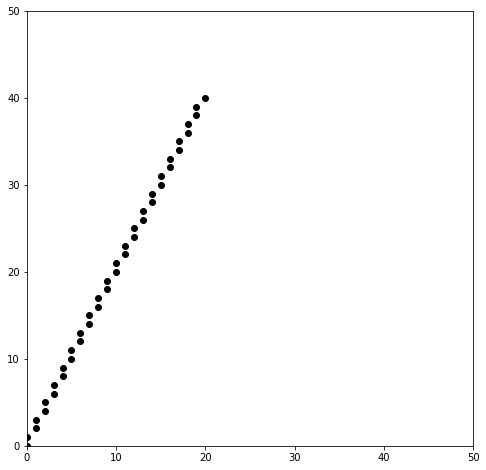

In [30]:
f = plt.figure(1, figsize = (8,8))
ax = f.gca()
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

x1 = 0.0
y1 = 0.0
x2 = 20.0
y2 = 40.0

dx = x2 - x1
dy = y2 - y1

sign_x = 1 if dx>0 else -1 if dx<0 else 0
sign_y = 1 if dy>0 else -1 if dy<0 else 0

if dx < 0: dx = -dx
if dy < 0: dy = -dy

if dx > dy:
    pdx, pdy = sign_x, 0
    es, el = dy, dx
else:
    pdx, pdy = 0, sign_y
    es, el = dx, dy

x, y = x1, y1

error, t = el/2, 0        

ax.plot(x, y, 'ko')
f.canvas.draw()

while t < el:
    error -= es
    if error < 0:
        error += el
        x += sign_x
        y += sign_y
    else:
        x += pdx
        y += pdy
    t += 1
    
    ax.plot(x, y, 'ko')
    f.canvas.draw()

print('Time spent:', (end - begin))

## 4. Алгоритм Брезенхема (окружность)

Time spent: 0.8455002307891846


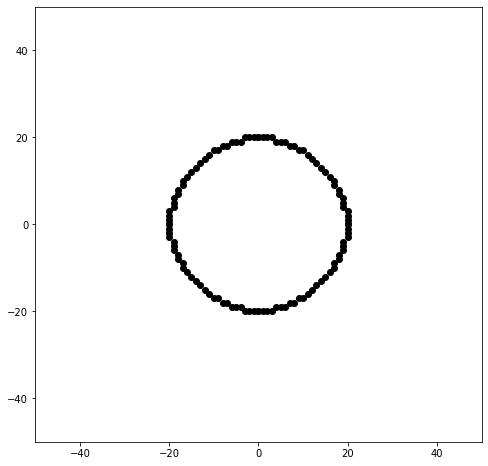

In [31]:
f = plt.figure(1, figsize = (8,8))
ax = f.gca()
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])

r = 20
x = 0
y = r
d = 3 - 2 * r

def plot(_x, _y, _radius):
    ax.plot(_x, _y, 'ko')
    ax.plot(-_x, _y, 'ko')
    ax.plot(_x, -_y, 'ko')
    ax.plot(-_x, -_y, 'ko')

    ax.plot(_y, _x, 'ko')
    ax.plot(_y, -_x, 'ko')
    ax.plot(-_y, _x, 'ko')
    ax.plot(-_y, -_x, 'ko')
    f.canvas.draw()

begin = time.time()
while y >= x:
    plot(x, y, r)
    x = x + 1
    if d > 0:
        y = y - 1
        d = d + 4 * (x - y) + 10
    else:
        d = d + 4 * x + 6
end = time.time()
print('Time spent:', (end - begin))